In [1]:
import sys
sys.path.append("/home/laba/golos/whisper_fine_tuning/dataset_creation/src/")

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm
import librosa
import glob

from utils import load_labels
from utils_model import load_model, predict_video
from utils_analysis import calculate_wer, clean_text_before_wer

In [2]:
# labels = load_labels('eval_dataset/labels_eval.jsonl')
# model_large = load_model('large')

In [ ]:
predicted_video = predict_video(video_id = 23,
                                dataset_path = "eval_dataset/",
                                model = model_large,
                                labels = labels,
                                pred_method='base')
calculate_wer(predicted_video)

(0.1768297202327833, 0.07793522267206478)

In [ ]:
predicted_video = predicted_video.sort_values('wer', ascending=False)

In [18]:
# predicted_video.head()

In [ ]:
segment_id=34
predicted_video.loc[segment_id][['label', 'prediction',
                                 'clean_label', 'clean_prediction', 'wer'
                                 ]].values

array(['У тіні прутня який вони забили на роботу Тож ремонт не розпочинається ні тут ні в іншому дворі Поїхати зараз до Людмили не можна бо',
       ' У тіні прутня, який вони забили на роботу. Тож, ремонт не розпочинається ні тут, ні в іншому дворі. Чому цим часом, насправді, 104 не поїхати? Поїхати зараз до Людмили не можна. Бо',
       'у тіні прутня який вони забили на роботу тож ремонт не розпочинається ні тут ні в іншому дворі поїхати зараз до людмили не можна бо',
       'у тіні прутня який вони забили на роботу тож ремонт не розпочинається ні тут ні в іншому дворі чому цим часом насправді 104 не поїхати поїхати зараз до людмили не можна бо',
       0.28], dtype=object)

In [70]:
df = pd.read_csv('results/labels.jsonl_baseline_prediction.csv')
df_eval = pd.read_csv('results/labels_eval.jsonl_baseline_prediction.csv')

df = pd.concat([df, df_eval])
print(df.shape)
df.head()

(14677, 2)


,label,prediction
0,Терміново Путін не нападе Бо він скоро помре Н...,Терміново! Путін не нападе! А він скоро помре...
1,хвора людина зараз Він хворіє на саркому А ще ...,"Хворий людина зараз, він хворіє на саркому. А..."
2,Путін кашляє труситься і в нього ледве рухаєть...,"Путін кашлює, труситься, і в нього ледве руха..."
3,Незрозуміла хвороблива хода І до всіх цих нега...,незрозуміла хвороблива худа. І до всіх цих не...
4,що у президента Росії рак хребта Джерела кажут...,що у президента Росії рак хребта. Джерела каж...


In [71]:
# there are 2 example where prediction nan and where label nan
df[df.label.isna()|df.prediction.isna()]

,label,prediction
235,NaN,Música
423,NaN,NaN
576,NaN,🎵
598,NaN,Walking to 2021 On my Tiker To
2170,NaN,Beeping
2809,Ааа Аааааа,NaN
3314,NaN,Ха-ха-ха! Ха-ха-ха! Хи-хи-хи-хи!
3348,NaN,AHHHHH!
3467,NaN,NaN
3989,Ммму Мммууууу М ууу Ммуу Мммуу,NaN


In [72]:
df = df.dropna()
calculate_wer(df)

(0.14474477101255454, 0.09090909090909091)

In [73]:
df.sort_values("wer", ascending=False).head(20)

,label,prediction,clean_label,clean_prediction,wer
6288,ооооо ооооо,"And you're standing on the edge face up, caus...",ооооо ооооо,and youre standing on the edge face up cause y...,18.500000
12604,Hands up don’t shoot,"Hands up, don't shoot! Hands up! In Los Angel...",hands up dont shoot,hands up dont shoot hands up in los angeles ho...,4.250000
11949,Флешкувгаагувідправляльне,Флешку в гаагу відправляльне!,флешкувгаагувідправляльне,флешку в гаагу відправляльне,4.000000
10909,Як вони це роблять,Та-та-та-та-яріпі-даві-дін-даві-ріпс-табі-дан...,як вони це роблять,татататаяріпідавідіндавіріпстабідандендандон у...,3.500000
6690,How do you do Аааа ахха,"Yeah, me. Obviously you do! Could you... Hi, ...",how do you do аааа ахха,yeah me obviously you do could you hi its shar...,3.000000
1639,Я глухий троха говори,I got a hook here. I got a hook on that.,я глухий троха говори,i got a hook here i got a hook on that,2.750000
6126,Дональд Джей Трамп Володімір Зеленській Дональ...,"Donald J. Trump. Ukraine, not the Ukraine. Vo...",дональд джей трамп володімір зеленській дональ...,donald j trump ukraine not the ukraine volodym...,2.181818
9456,Комирозставляльне,Коми розставляльне.,комирозставляльне,коми розставляльне,2.000000
10584,Саме так на російському телеканалі,Нелегкая эта работа в ФМС тащить с бегемотом....,саме так на російському телеканалі,нелегкая эта работа в фмс тащить с бегемотом с...,2.000000
6519,Відкривайтесь назад,Off in the back.,відкривайтесь назад,off in the back,2.000000


In [74]:
df['label_len'] = df['label'].apply(lambda x: len(x.split(' ')))

Text(0, 0.5, 'label_len')

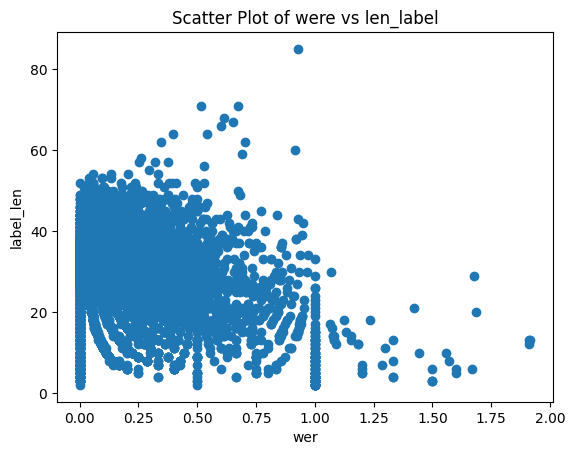

In [75]:
wer_th = 2
plt.scatter(df[df.wer<wer_th]['wer'], df[df.wer<wer_th]['label_len'])
plt.title('Scatter Plot of were vs len_label')
plt.xlabel('wer')
plt.ylabel('label_len')


In [82]:
df[df.label_len>80].loc[2883].values

array(['Ви за Бандеру чи проти Бандери Ні ні Ігорю Ви за Бандеру чи проти Бандери Я за Україну Ігорю це вже інше питання Ви за Бандеру чи проти Бандери Ви за Україну чи проти Я за Україну більше тих хто її розкрадає Ви за Бандеру чи проти Бандери Ні ні Ігорю Ви за Бандеру чи проти Бандери Я за Україну Ігорю це вже інше питання Ви за Бандеру чи проти Бандери Ви за Україну чи проти Я за Україну більше тих хто її розкрадає ',
       ' Вы за Бандеру или против Бандеры? Нет, Игорь, это уже другое. Я за Украину. Вы за Бандеру или против Бандеры?',
       'ви за бандеру чи проти бандери ні ні ігорю ви за бандеру чи проти бандери я за україну ігорю це вже інше питання ви за бандеру чи проти бандери ви за україну чи проти я за україну більше тих хто її розкрадає ви за бандеру чи проти бандери ні ні ігорю ви за бандеру чи проти бандери я за україну ігорю це вже інше питання ви за бандеру чи проти бандери ви за україну чи проти я за україну більше тих хто її розкрадає',
       'вы за бандеру или 

In [88]:
# print(len(df.loc[2883]["label"]))
# print(len(df.loc[2883]["prediction"]))

df[df["label"].apply(len) > 2*df["prediction"].apply(len)]

,label,prediction,clean_label,clean_prediction,wer,label_len
138,Здесь всегда зажигает Volodymyr Zelenskyy Pres...,"Ти завжди зажигаєш! Володимир Зеленський, пре...",здесь всегда зажигает volodymyr zelenskyy pres...,ти завжди зажигаєш володимир зеленський презид...,0.965517,30
326,До дупи Вчителька в школі казала Не слухай що...,До дупи!,до дупи вчителька в школі казала не слухай що ...,до дупи,0.945946,39
483,Тіло так хоче до тіл Щоби об єднатися в єдиний...,"Оце так прикол! Замість того, щоб тривіально ...",тіло так хоче до тіл щоби об єднатися в єдиний...,оце так прикол замість того щоб тривіально тан...,0.605263,39
484,Справжні митці завжди випереджають свою епоху ...,Справжні митці завжди випереджають свою епоху...,справжні митці завжди випереджають свою епоху ...,справжні митці завжди випереджають свою епоху ...,0.700000,40
519,Homanda atta atta rata teda baka sanda atta a...,"Секс, наркотики, дашахи.",homanda atta atta rata teda baka sanda atta am...,секс наркотики дашахи,0.909091,24
...,...,...,...,...,...,...
13293,прагнуть статевого акту Підозрюю що з більшіст...,"прагнуть статевого акту. Підозрюю, що з більш...",прагнуть статевого акту підозрюю що з більшіст...,прагнуть статевого акту підозрюю що з більшіст...,0.627907,44
13468,Трохиненормальне Голова Верховної Ради Дмитро ...,Трохи ненормальне. Голова Верховної Ради Дмит...,трохиненормальне голова верховної ради дмитро ...,трохи ненормальне голова верховної ради дмитро...,0.722222,37
13718,Yeeeee eee,Ok.,yeeeee eee,ok,1.000000,4
185,парламентського крижня Вакарчука з трибуни Вер...,парламентського Крижня Вакарчука з трибуни Ве...,парламентського крижня вакарчука з трибуни вер...,парламентського крижня вакарчука з трибуни вер...,0.708333,25


In [64]:
df[df.wer >= 1]

,label,prediction,clean_label,clean_prediction,wer
124,Здоров’я вам щастя любові та радості Всім всі...,"Здоровья, счастья, любви и радости Всем, всем...",здоровя вам щастя любові та радості всім всім ...,здоровья счастья любви и радости всем всем всем,1.000000
231,обмежити права людини та знищити будь яку опоз...,обмежити права людини та знищити будь-яку опо...,обмежити права людини та знищити будь яку опоз...,обмежити права людини та знищити будьяку опози...,1.000000
247,Пунькайте,Понякай-то.,пунькайте,понякайто,1.000000
581,Холостячка Ох хо Це так круто Ооой еех Ааааа ...,Холостячка! Че они так долго? Че целуются? Ой...,холостячка ох хо це так круто ооой еех ааааа а...,холостячка че они так долго че целуются ой это...,1.083333
655,Або ні,Abo ní.,або ні,abo ní,1.000000
...,...,...,...,...,...
98,Аааа аааа ооо ооо о А ааа ааа а Оуооо воооооо,"Oh, oh, oh, oh. Oh, oh, oh, oh.",аааа аааа ооо ооо о а ааа ааа а оуооо воооооо,oh oh oh oh oh oh oh oh,1.000000
210,многая літааааа Многая Разом лііітаааа Многая ...,"Много я лита, много я разом лита, много я лия...",многая літааааа многая разом лііітаааа многая ...,много я лита много я разом лита много я лияся ...,1.076923
371,Істина Комирозставляльне,Істина. Коми розставляльне.,істина комирозставляльне,істина коми розставляльне,1.000000
426,Класика,Классика.,класика,классика,1.000000


In [61]:
df[df.wer == 0.5]

,label,prediction,clean_label,clean_prediction,wer
422,Животипорвальне Парламент Данії перетворився н...,Животип рвальний! Парламент Данії перетворивс...,животипорвальне парламент данії перетворився н...,животип рвальний парламент данії перетворився ...,0.5
725,Дідько знову Мозґі Дідько давайте краще у наш ...,"Дітько, знову мозгі? Дітько, давайте краще у ...",дідько знову мозґі дідько давайте краще у наш ...,дітько знову мозгі дітько давайте краще у наш ...,0.5
917,Героям слава Будьласочкавукраїнугрошіінвестув...,"Героям слава! Будьласочка, в Україну гроші ін...",героям слава будьласочкавукраїнугрошіінвестува...,героям слава будьласочка в україну гроші інвес...,0.5
1837,Юхуу Так звичайно Ні звичайно Володимир Путін ...,"Йху! Ще поїдеш? Так, звичайно. Володимир Путі...",юхуу так звичайно ні звичайно володимир путін ...,йху ще поїдеш так звичайно володимир путін зал...,0.5
2486,Зу бо жін ня Дайте мені більше ваших страждань...,Зубожіння! Дайте мені більше ваших страждань!...,зу бо жін ня дайте мені більше ваших страждань...,зубожіння дайте мені більше ваших страждань зу...,0.5
...,...,...,...,...,...
13023,Але одразу офігіваємо якщо вони починають її в...,"Але одразу офігіваємо, якщо вони починають її...",але одразу офігіваємо якщо вони починають її в...,але одразу офігіваємо якщо вони починають її в...,0.5
13192,в краєзнавчому музеї поруч з розділом про секс...,в краезнавчем музее поруч с разделом про секс...,в краєзнавчому музеї поруч з розділом про секс...,в краезнавчем музее поруч с разделом про секс ...,0.5
13615,Озернувся вернувся поспішно Поглядів задрожав ...,Рага-поп – це проект учасниць «Дах Дотерс» Ру...,озернувся вернувся поспішно поглядів задрожав ...,рагапоп це проект учасниць дах дотерс руслани ...,0.5
453,Король Рама Х винайняв весь 4 зірковий готель ...,Король Рама X виненяв весь чотиризірковий гот...,король рама х винайняв весь 4 зірковий готель ...,король рама x виненяв весь чотиризірковий готе...,0.5


In [20]:
train_labels = load_labels("dataset/labels.jsonl")

In [90]:
keys_with_value = [(key, len(value)) for key, value in train_labels.items() if "До дупи Вчителька в школі казала Не" in value]
keys_with_value


[('dataset/toronto_100/toronto_100_78.wav', 173)]

In [50]:
# remove empty string (string that containe only whitespace)
# remove all whisper predictions where it is Nan
# remove row if label has less than 10 characters
# delete all samples that have WER >= 1 based on whisper large
# df[df["label"].apply(len) > 3*df["prediction"].apply(len)]
# add tensorboard

eval_dataset/toronto_23/toronto_23_0.wav Ура Україна була у чверть фіналі Євро Телебачення Торонто Гей У чвертьфіналі Євро Україна прграла Англії з рахунком 4 0 Це поки що найсолодша поразка збірної України з футболу 


In [59]:
sorted(keys_with_value, key=lambda x: x[1])

[('dataset/toronto_153/toronto_153_165.wav', 6),
 ('dataset/toronto_127/toronto_127_28.wav', 16),
 ('dataset/toronto_129/toronto_129_28.wav', 79),
 ('dataset/toronto_101/toronto_101_10.wav', 82),
 ('dataset/toronto_77/toronto_77_63.wav', 90),
 ('dataset/toronto_13/toronto_13_90.wav', 124),
 ('dataset/toronto_36/toronto_36_0.wav', 124),
 ('dataset/toronto_54/toronto_54_79.wav', 125),
 ('dataset/toronto_144/toronto_144_127.wav', 125),
 ('dataset/toronto_168/toronto_168_153.wav', 125),
 ('dataset/toronto_168/toronto_168_21.wav', 136),
 ('dataset/toronto_77/toronto_77_90.wav', 138),
 ('dataset/toronto_8/toronto_8_105.wav', 139),
 ('dataset/toronto_168/toronto_168_129.wav', 140),
 ('dataset/toronto_156/toronto_156_137.wav', 142),
 ('dataset/toronto_83/toronto_83_20.wav', 145),
 ('dataset/toronto_134/toronto_134_102.wav', 145),
 ('dataset/toronto_168/toronto_168_11.wav', 147),
 ('dataset/toronto_152/toronto_152_15.wav', 148),
 ('dataset/toronto_170/toronto_170_153.wav', 148),
 ('dataset/toro